# 最小二乗法サンプル

ランダムなデータを直線で近似する。
$$y = ax+b$$

以下の$E(x_i, y_i)$が最小になるように計算する
$$E(x_i, y_i) = \sum_{i=1}^N\frac{1}{2}\bigl(y_i - (ax_i+b)\bigr)^2$$

$a, b$について偏微分すると,
$$\frac{\partial E}{\partial a} = \sum_{i=1}^N\bigl(y_i - (ax_i+b)\bigr)(-x_i)$$
$$\frac{\partial E}{\partial b} = \sum_{i=1}^N\bigl(y_i - (ax_i+b)\bigr)(-1)$$

ここで、
$$\frac{\partial E}{\partial a} = 0$$

$$\frac{\partial E}{\partial b} = 0$$
となるとき、$E(x_i, y_i)$は最小となるので

$$\Bigl(\sum_{i=1}^Nx_i^2\Bigr)a + \Bigl(\sum_{i=1}^Nx_i\Bigr)b = \sum_{i=1}^Ny_ix_i$$
$$\Bigl(\sum_{i=1}^Nx_i\Bigr)a + \Bigl(\sum_{i=1}^N1\Bigr)b = \sum_{i=1}^Ny_i$$

これを行列表記で表すと
$$
\begin{pmatrix}
\sum_{i=1}^Nx_i^2 & \sum_{i=1}^Nx_i \\
\sum_{i=1}^Nx_i & \sum_{i=1}^N1\\
\end{pmatrix}
\begin{pmatrix}
a \\
b \\
\end{pmatrix}=
\begin{pmatrix}
\sum_{i=1}^Ny_ix_i \\
\sum_{i=1}^Ny_i \\
\end{pmatrix}
$$

よって、
$$
\begin{pmatrix}
a \\
b \\
\end{pmatrix}=
\begin{pmatrix}
\sum_{i=1}^Nx_i^2 & \sum_{i=1}^Nx_i \\
\sum_{i=1}^Nx_i & \sum_{i=1}^N1\\
\end{pmatrix}^{-1}
\begin{pmatrix}
\sum_{i=1}^Ny_ix_i \\
\sum_{i=1}^Ny_i \\
\end{pmatrix}
$$

## これを計算するプログラムを以下に示す

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

サンプルデータの作成

In [2]:
x = np.linspace(-5, 5, 100)
a = 3.0; b = 1.0;
noise = np.random.normal(0, 10, 100)
y = (a*x + b) + noise

$a, b$ の係数行列を求める

In [3]:
W = np.zeros((2, 3))
W[0, 0] = (x*x).sum()
W[1, 0] = x.sum()
W[0, 1] = x.sum()
W[1, 1] = len(x)
W[0, 2] = (y * x).sum()
W[1, 2] = y.sum()
inv_W = np.linalg.inv(W[:, 0:2])
lin = inv_W.dot(W[:, 2:3])

結果をプロットする

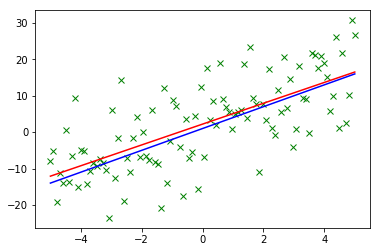

True(red) : y = 3x + 1
Esti(blue): y = 2.862211x + 2.212838


In [6]:
plt.plot(x, y, "gx")
plt.plot(x, lin[0]*x+lin[1], "r-")
plt.plot(x, a*x+b, "b-")
plt.show()
print("True(red) : y = %dx + %d" %(a, b))
print("Esti(blue): y = %fx + %f" %(lin[0], lin[1]))